In [37]:
from commonfunctions import *
from skimage.filters import gaussian 
from skimage.color import rgb2ycbcr
from skimage.transform import resize
import numpy as np
import math
from skimage.morphology import binary_erosion, binary_dilation
from skimage import exposure



In [285]:
def erode(img, window_size, origin_position):
    new_img = np.ones((img.shape[0], img.shape[1]))
    for i in range(origin_position[0], img.shape[0] - window_size[0] + origin_position[0]):
        for j in range(origin_position[1], img.shape[1] - window_size[1] + origin_position[1]):
            x_start = i-origin_position[0]
            y_start = j-origin_position[1]
            mini = 256
            for x in range( x_start , x_start + window_size[0]):
                for y in range( y_start, y_start + window_size[1]):
                    if img[x][y] < mini:
                        mini = img[x][y]
                        
            if(x_start + window_size[0]+1 < img.shape[0] and img[x_start + window_size[0]+1][y_start]<mini):
                mini = img[x_start + window_size[0]+1][y_start]
            if(y_start + window_size[1]+1 < img.shape[1] and img[x_start ][y_start+ window_size[1]+1]<mini):
                mini = img[x_start ][y_start+ window_size[1]+1]
                
            if(x_start + window_size[0]-1 > 0 and img[x_start + window_size[0]-1][y_start]<mini):
                mini = img[x_start + window_size[0]-1][y_start]
            if(y_start + window_size[1]-1 > 0 and img[x_start ][y_start+ window_size[1]-1]<mini):
                mini = img[x_start ][y_start+ window_size[1]-1]
            
            new_img[i,j] = mini 
    return new_img



def erodesmall(img, window_size, origin_position):
    new_img = np.ones((img.shape[0], img.shape[1]))
    for i in range(origin_position[0], img.shape[0] - window_size[0] + origin_position[0]):
        for j in range(origin_position[1], img.shape[1] - window_size[1] + origin_position[1]):
            x_start = i-origin_position[0]
            y_start = j-origin_position[1]
            mini = 256
            for x in range( x_start , x_start + window_size[0]):
                for y in range( y_start, y_start + window_size[1]):
                    if img[x][y] < mini:
                        mini = img[x][y]
            
            new_img[i,j] = mini 
    return new_img



def dilate(img, window_size, origin_position):
    new_img = np.ones((img.shape[0], img.shape[1]))
    for i in range(origin_position[0], img.shape[0] - window_size[0] + origin_position[0]):
        for j in range(origin_position[1], img.shape[1] - window_size[1] + origin_position[1]):
            x_start = i-origin_position[0]
            y_start = j-origin_position[1]
            maxi = -1
            for x in range( x_start , x_start + window_size[0]):
                for y in range( y_start, y_start + window_size[1]):
                    if img[x][y] > maxi:
                        maxi = img[x][y]
            if(x_start + window_size[0]+1 < img.shape[0] and img[x_start + window_size[0]+1][y_start]>maxi):
                maxi = img[x_start + window_size[0]+1][y_start]
            if(y_start + window_size[1]+1 < img.shape[1] and img[x_start ][y_start+ window_size[1]+1]>maxi):
                   maxi = img[x_start ][y_start+ window_size[1]+1]
                
            if(x_start + window_size[0]-1 > 0 and img[x_start + window_size[0]-1][y_start]>maxi):
                maxi = img[x_start + window_size[0]-1][y_start]
            if(y_start + window_size[1]-1 > 0 and img[x_start ][y_start+ window_size[1]-1]>maxi):
                maxi = img[x_start ][y_start+ window_size[1]-1]
            new_img[i,j] = maxi
    return new_img


def distance(img, ic,jc):
    arr=[]
    for i in range(25,ic):
        for j in range(30,jc):
            if(img[i][j]==1):
                dist= math.sqrt((i-ic)**2 + (j-jc)**2)
                for n in range(25,175):
                    for m in range(jc,150):
                        if(img[n][m]==1):
                            dist2= math.sqrt((n-ic)**2 + (m-jc)**2)
                            if(abs(dist-dist2)/dist<30/100):
                                arr.append([i,j,n,m])
                                
    arrnp =np.asarray(arr)
    
    return arrnp
                            
                        
                

[[1.28719454 1.28719454 1.28719454 ... 1.28719454 1.28719454 1.28719454]
 [1.28719454 1.78295725 1.78295725 ... 1.78295725 1.28719454 1.28719454]
 [1.28719454 1.78295725 1.78295725 ... 1.78295725 1.28719454 1.28719454]
 ...
 [1.28719454 1.78295725 1.78295725 ... 1.78295725 1.28719454 1.28719454]
 [1.28719454 1.28719454 1.28719454 ... 1.28719454 1.28719454 1.28719454]
 [1.28719454 1.28719454 1.28719454 ... 1.28719454 1.28719454 1.28719454]]


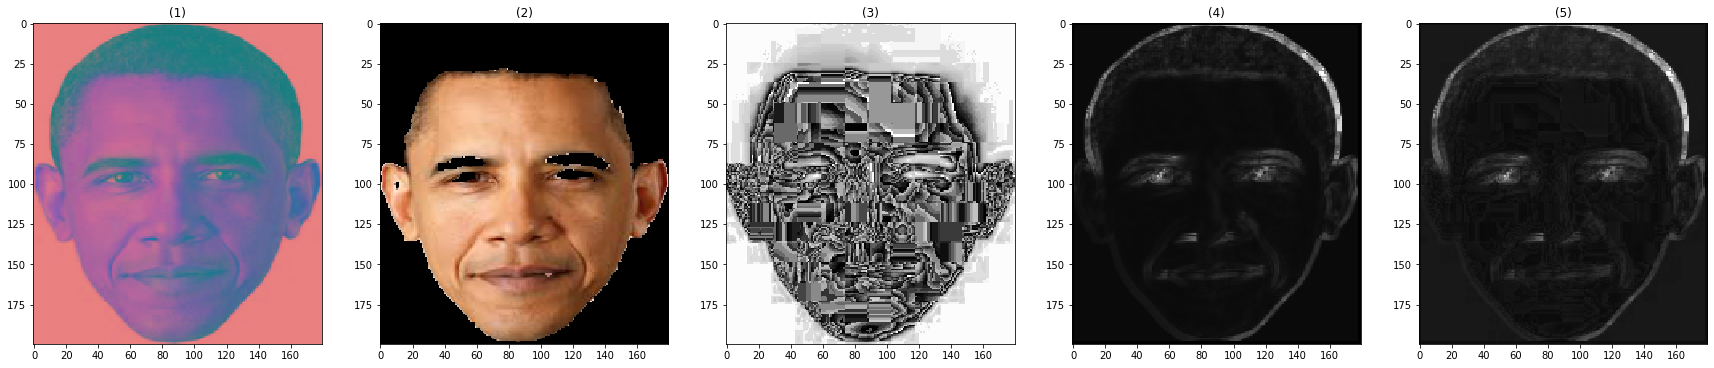

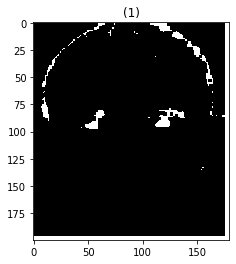

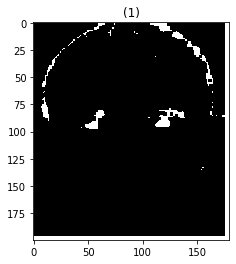

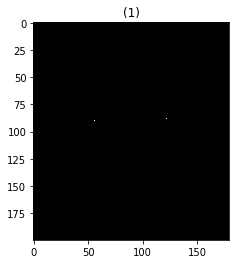

[ 90  56  88 122]
65534
73.0
89
89


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:95: RuntimeWarning: overflow encountered in ushort_scalars


In [399]:
input_img = io.imread('download1.jpg')
filtered_img3 = gaussian(input_img, sigma=0.2)

grey_image =  rgb2gray(filtered_img3)



resized_image=resize(filtered_img3,(200,180))

ycbcr_image = rgb2ycbcr(resized_image).astype('uint8')









y = ycbcr_image[:,:,0]



cb = ycbcr_image[:,:,1]
cr = ycbcr_image[:,:,2]
new_imageycbcr[cr<140]=0
new_imageycbcr[cr>140]=resized_image[cr>140]

#ycbcr_image = rgb2ycbcr(new_imageycbcr).astype('uint8')



#y = ycbcr_image[:,:,0]



#cb = ycbcr_image[:,:,1]
#cr = ycbcr_image[:,:,2]



chromamap= 1/3 *((cb/cr) + cb**2 + (1-cr)**2)

newchromamap = exposure.equalize_hist(chromamap)


windowsize=[3,3]
orgin=[1,1]
ydilate= dilate(y,windowsize,orgin)
yerode= erode(y,windowsize,orgin)

lumamap = ydilate / (yerode+1)


eyemap =(1-newchromamap)+lumamap

print(eyemap)

show_images([ycbcr_image,new_imageycbcr,1-newchromamap,lumamap,eyemap])


thresh =np.max(eyemap)*0.6
eyemap[eyemap<2.5]=0
eyemap[eyemap>2.5]=1


eyemap= erode(eyemap,windowsize,orgin)
eyemap= dilate(eyemap,windowsize,orgin)
windowsize=[3,3]
orgin=[1,1]
eyemap= erodesmall(eyemap,windowsize,orgin)
show_images([eyemap])

cropped_eyemap=eyemap
show_images([cropped_eyemap])

arrnp=distance(cropped_eyemap, 100,90)


righti = np.mean(arrnp[:,0])
rightj = np.mean(arrnp[:,1])
lefti = np.mean(arrnp[:,2])
leftj = np.mean(arrnp[:,3])
eyearr=np.asarray([righti,rightj,lefti,leftj])

eyearr=eyearr.astype('uint16')
new_croppedimg=np.zeros(cropped_eyemap.shape)

new_croppedimg[eyearr[0],eyearr[1]]=1

new_croppedimg[eyearr[2],eyearr[3]]=1
show_images([new_croppedimg])

print(eyearr)
print((eyearr[2]-eyearr[0]))

#distanceofeye = math.sqrt((eyearr[2]-eyearr[0])**2+(eyearr[3]-eyearr[1])**2)

print(distanceofeye)

midpointx= int((eyearr[0]+eyearr[2])/2)
midpointy= int((eyearr[1]+eyearr[3])/2)


#nosex = int((distanceofeye+midpointx) *0.78)
#nosey = midpointy


#new_croppedimg[nosex,nosey]=1

#show_images([new_croppedimg])

print(midpointx)
print(midpointy)


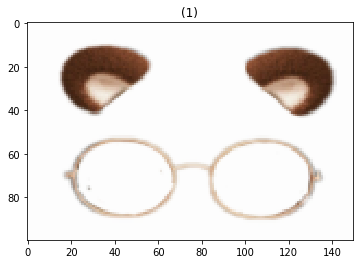

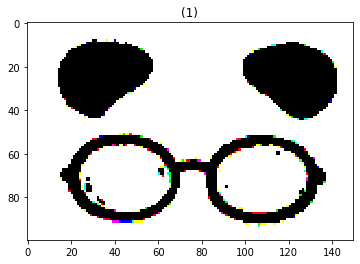

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


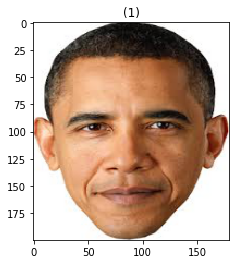

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


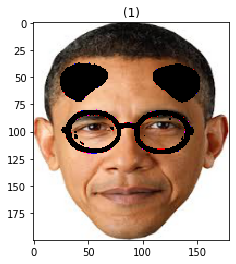

In [400]:
''' black sunglasses
sunglass_image = io.imread('sun.jpg')

show_images([sunglass_image])

resized_sunglass=resize(sunglass_image[0:600,:],(100,150))
show_images([resized_sunglass])
print(resized_sunglass)

resized_sunglass[resized_sunglass>=0.99607843]=1
resized_sunglass[resized_sunglass<0.99607843]=0
show_images([resized_sunglass])

show_images([resized_image])
for i in range(resized_sunglass.shape[0]):
    for j in range(resized_sunglass.shape[1]):
        if resized_sunglass[i,j,1]==0:
            resized_image[midpointx-50+i,midpointy-75+j]=(resized_sunglass[i,j])
           
        
show_images([resized_image])
'''



sunglass_image = io.imread('sunsun.jpg')


resized_sunglass=resize(sunglass_image[0:600,200:700],(100,150))
show_images([resized_sunglass])


resized_sunglass[resized_sunglass>=0.99215686]=1
resized_sunglass[resized_sunglass<0.99215686]=0
show_images([resized_sunglass])

show_images([resized_image])
for i in range(resized_sunglass.shape[0]):
    for j in range(resized_sunglass.shape[1]):
        if resized_sunglass[i,j,1]==0:
            resized_image[midpointx-60+i,midpointy-78+j]=(resized_sunglass[i,j])
    
show_images([resized_image])


